In [1]:
pip install pandas mlxtend matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori, association_rules


In [5]:
#DOWNLOADING THE DATASET REQUIRED FOR PROJECT
import pandas as pd

# Recommended: use raw string format (r'path')
file_path = r"C:/Users/Admin/Desktop/newdataforminiproject1.xlsx"  # Replace with your actual path

# Load the Excel file
df = pd.read_excel(file_path)

# Display the first 5 rows
df.head()


C:\Users\Admin\anaconda3\New folder\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
C:\Users\Admin\anaconda3\New folder\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01.12.2010 08:26,2.0,NaN,NaN
1,536365,WHITE METAL LANTERN,6.0,01.12.2010 08:26,3.0,NaN,NaN
2,536365,CREAM CUPID HEARTS COAT HANGER,8.0,01.12.2010 08:26,2.0,NaN,NaN
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01.12.2010 08:26,3.0,NaN,NaN
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6.0,01.12.2010 08:26,3.0,NaN,NaN


In [6]:
df.head()  # Show the first 5 rows
df.columns  # View column names


Index(['BillNo', 'Itemname', 'Quantity', 'Date', 'Price', 'CustomerID',
       'Country'],
      dtype='object')

In [7]:
print(df)


        BillNo                             Itemname  Quantity  \
0       536365   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1       536365                  WHITE METAL LANTERN       6.0   
2       536365       CREAM CUPID HEARTS COAT HANGER       8.0   
3       536365  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4       536365       RED WOOLLY HOTTIE WHITE HEART.       6.0   
...        ...                                  ...       ...   
522059  581587          PACK OF 20 SPACEBOY NAPKINS      12.0   
522060  581587          CHILDREN'S APRON DOLLY GIRL       6.0   
522061  581587         CHILDRENS CUTLERY DOLLY GIRL       4.0   
522062  581587      CHILDRENS CUTLERY CIRCUS PARADE       4.0   
522063  581587         BAKING SET 9 PIECE RETROSPOT       3.0   

                    Date  Price  CustomerID Country  
0       01.12.2010 08:26    2.0         NaN     NaN  
1       01.12.2010 08:26    3.0         NaN     NaN  
2       01.12.2010 08:26    2.0         NaN     NaN  
3  

In [8]:
#CALCULATING TOTAL NUMBER OF DATAS IN THE FOLLOWING ROWS OR COLUMNS IN A DATASET
print("Total rows:", len(df))


Total rows: 522064


In [11]:
#CLEANING THE DATA BY REMOVING THE ROW WITH MISSING ITEM NAMES OR BILL NUMBER IN RESPECTIVE ROWS AND COLUMNS
# Remove rows with missing item names or bill numbers
df = df.dropna(subset=["BillNo", "Itemname"])

# Optional: drop rows where Quantity <= 0 or Price <= 0 (returns, errors, etc.)
df = df[(df["Quantity"] > 0) & (df["Price"] > 0)]

# Convert Date to datetime format
df["Date"] = pd.to_datetime(df["Date"], errors='coerce', dayfirst=True)


In [12]:
# TOTAL NUMBER OF TRANSACTION
total_bills = df["BillNo"].nunique()

# Most sold items
top_items = df["Itemname"].value_counts().head(10)

# Revenue per item
df["TotalValue"] = df["Quantity"] * df["Price"]
top_revenue_items = df.groupby("Itemname")["TotalValue"].sum().sort_values(ascending=False).head(10)


C:\Users\Admin\anaconda3\New folder\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\Admin\anaconda3\New folder\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\Admin\anaconda3\New folder\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


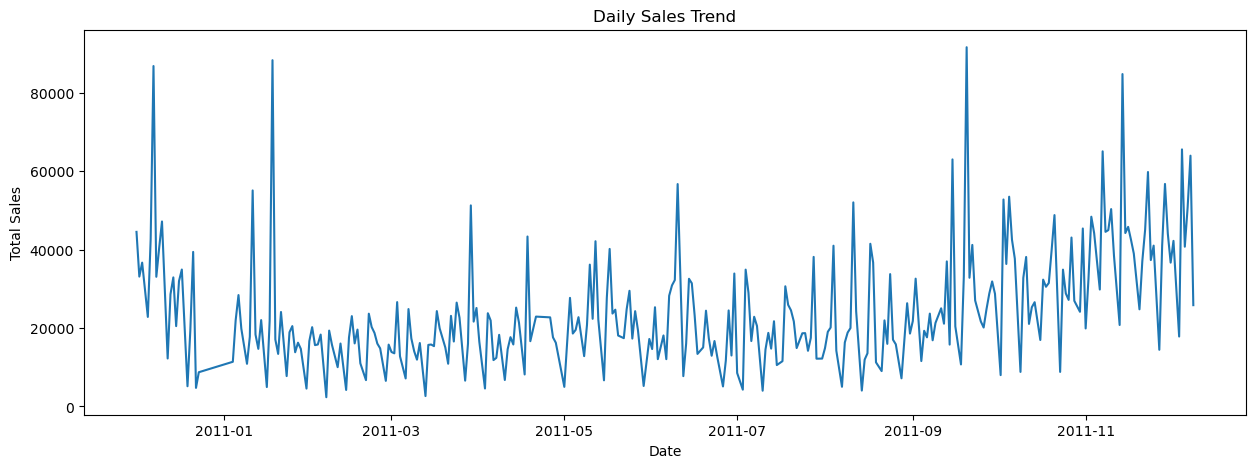

In [13]:
# SALES OVER TIME
sales_per_day = df.groupby(df["Date"].dt.date)["TotalValue"].sum()

# Plot (requires matplotlib or seaborn)
import matplotlib.pyplot as plt
sales_per_day.plot(figsize=(15,5), title="Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


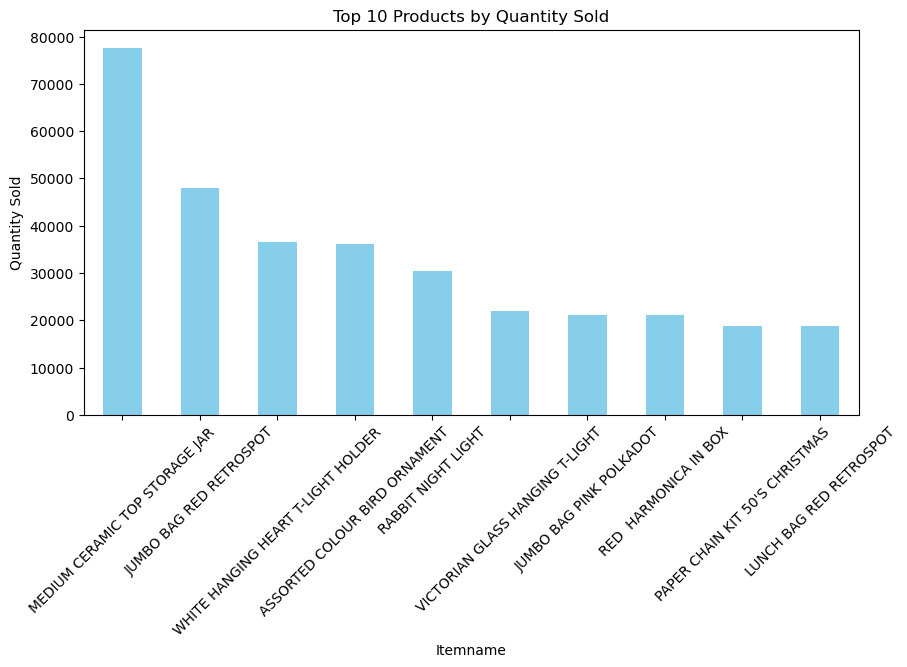

In [14]:
#TOP 10 PRODUCTS SOLD BY QUANTITY
top_qty = df.groupby("Itemname")["Quantity"].sum().sort_values(ascending=False).head(10)

# Bar plot
top_qty.plot(kind="bar", figsize=(10,5), title="Top 10 Products by Quantity Sold", color='skyblue')
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()


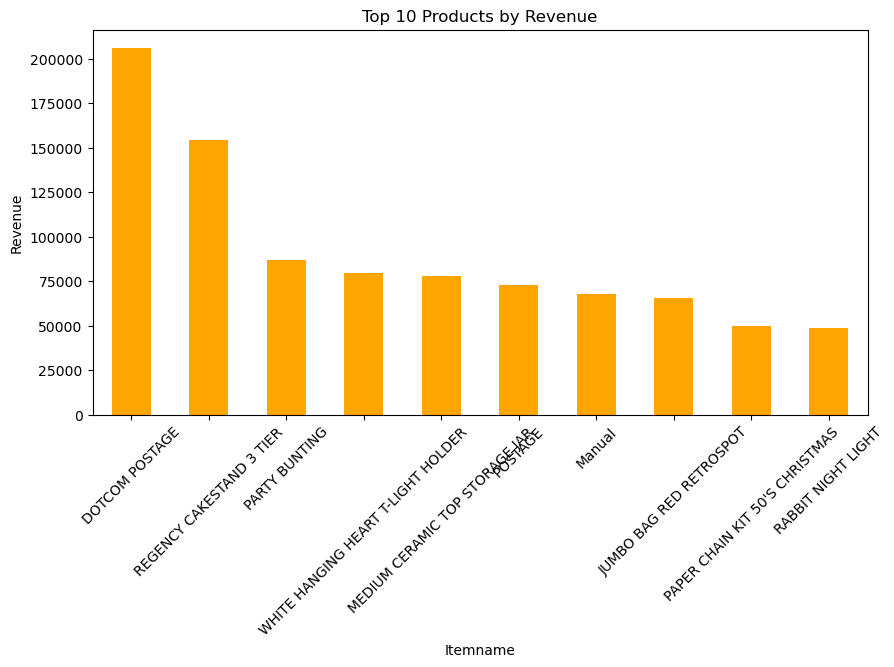

In [15]:
#TOP 10 PRODUCTS BY REVENUE
top_revenue = df.groupby("Itemname")["TotalValue"].sum().sort_values(ascending=False).head(10)

# Bar plot
top_revenue.plot(kind="bar", figsize=(10,5), title="Top 10 Products by Revenue", color='orange')
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


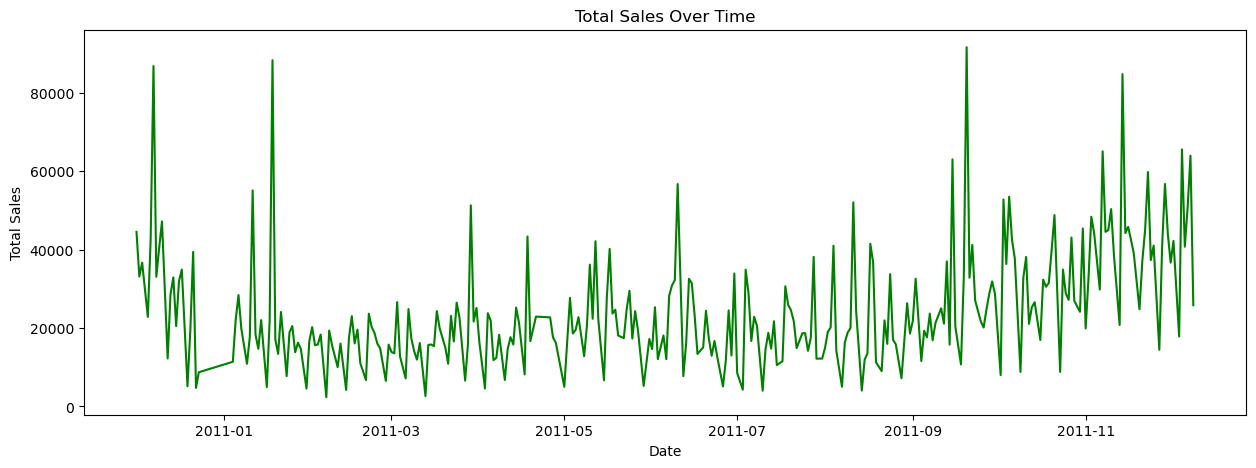

In [16]:
#TOTAL SALES OVER TIME
sales_per_day = df.groupby(df["Date"].dt.date)["TotalValue"].sum()

sales_per_day.plot(figsize=(15,5), title="Total Sales Over Time", color='green')
plt.ylabel("Total Sales")
plt.xlabel("Date")
plt.show()


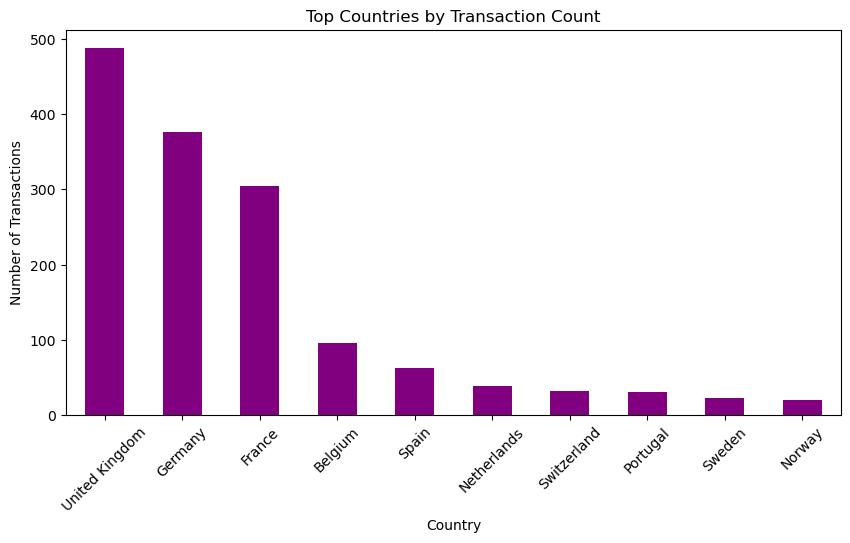

In [17]:
#TOP COUNTRIES BY TRANSACTION COUNT
transactions_by_country = df.groupby("Country")["BillNo"].nunique().sort_values(ascending=False).head(10)

transactions_by_country.plot(kind="bar", figsize=(10,5), title="Top Countries by Transaction Count", color='purple')
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()


In [23]:

# Count the number of unique items bought in each transaction
item_count_per_transaction = df.groupby('BillNo')['Itemname'].nunique().reset_index()
item_count_per_transaction.columns = ['BillNo', 'UniqueItemsCount']

# Merge this back with the original dataframe
df = pd.merge(df, item_count_per_transaction, on='BillNo', how='left')


In [27]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [28]:
#TOP 10 SELLING ITEMS MONTHLY SALES AND SALES BY WEEKEND
import pandas as pd
# Load the dataset (Replace with your actual file path)
df = pd.read_excel('C:/Users/Admin/Desktop/newdataforminiproject1.xlsx')  # Adjust path to your file location

# Step 1: Calculate TotalPurchaseValue (Quantity * Price)
df['TotalPurchaseValue'] = df['Quantity'] * df['Price']

# Step 2: Convert 'Date' column to datetime (if not already in datetime format)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Step 3: Extract Month and Weekday from the 'Date' column
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.day_name()

# Step 4: Remove rows with missing or invalid TotalPurchaseValue
df = df.dropna(subset=['TotalPurchaseValue'])

# Step 5: Group by Month and calculate total sales for each month
monthly_sales = df.groupby('Month')['TotalPurchaseValue'].sum().reset_index()

# Step 6: Group by Weekday and calculate total sales for each weekday
weekday_sales = df.groupby('Weekday')['TotalPurchaseValue'].sum().reset_index()

# Sorting weekdays to match their natural order
ordered_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales['Weekday'] = pd.Categorical(weekday_sales['Weekday'], categories=ordered_weekdays, ordered=True)
weekday_sales_sorted = weekday_sales.sort_values('Weekday')

# Step 7: Group by Itemname and calculate total sales for each item
item_sales = df.groupby('Itemname')['TotalPurchaseValue'].sum().reset_index()

# Sort items by total sales in descending order to get the top-selling items
top_items = item_sales.sort_values(by='TotalPurchaseValue', ascending=False).head(10)

# Displaying the results

print("Monthly Sales:\n", monthly_sales)
print("\nSales by Weekday:\n", weekday_sales_sorted)
print("\nTop 10 Selling Items:\n", top_items)

Monthly Sales:
     Month  TotalPurchaseValue
0     1.0            216465.0
1     2.0            221972.0
2     3.0            248953.0
3     4.0            270682.0
4     5.0            285845.0
5     6.0            274519.0
6     7.0            396512.0
7     8.0            290241.0
8     9.0            250931.0
9    10.0            293618.0
10   11.0            292369.0
11   12.0            161151.0

Sales by Weekday:
      Weekday  TotalPurchaseValue
1     Monday            446032.0
5    Tuesday            561298.0
6  Wednesday            320396.0
4   Thursday            535370.0
0     Friday            497849.0
2   Saturday            405824.0
3     Sunday            436489.0

Top 10 Selling Items:
                                 Itemname  TotalPurchaseValue
1056                      DOTCOM POSTAGE            205899.0
2837            REGENCY CAKESTAND 3 TIER            154206.0
2399                       PARTY BUNTING             86666.0
3816  WHITE HANGING HEART T-LIGHT HOLDER  

In [29]:
#TOTAL PURCHASE VALUES OF WEEKDAYS
# Extract the day of the week from the 'Date' column (0=Monday, 6=Sunday)
df['Weekday'] = df['Date'].dt.weekday

# Group by 'Weekday' and calculate total sales for each day of the week
weekday_sales = df.groupby('Weekday')['TotalPurchaseValue'].sum().reset_index()

# Sort by total sales in descending order
weekday_sales_sorted = weekday_sales.sort_values('TotalPurchaseValue', ascending=False)

# Display sales performance by weekday
print(weekday_sales_sorted)


   Weekday  TotalPurchaseValue
1      1.0            561298.0
3      3.0            535370.0
4      4.0            497849.0
0      0.0            446032.0
6      6.0            436489.0
5      5.0            405824.0
2      2.0            320396.0


In [30]:
#TOTAL PURCHASE VALUES OF CUSTOMERS
# Group by 'CustomerID' to calculate total spend for each customer
customer_sales = df.groupby('CustomerID')['TotalPurchaseValue'].sum().reset_index()

# Sort by total spend in descending order
customer_sales_sorted = customer_sales.sort_values('TotalPurchaseValue', ascending=False)

# Display the top 10 highest-spending customers
print(customer_sales_sorted.head(10))


     CustomerID  TotalPurchaseValue
589     17450.0             10496.0
480     15581.0              2750.0
67      12471.0              2400.0
420     14607.0              2120.0
112     12540.0              1820.0
246     12748.0              1788.0
469     15482.0              1646.0
422     14646.0              1458.0
201     12681.0              1422.0
198     12678.0              1297.0


In [32]:
#AVERAGE PURCHASE VALUE NY TRANSACTION
# Group by 'BillNo' and calculate total purchase value per transaction
transaction_sales = df.groupby('BillNo')['TotalPurchaseValue'].sum().reset_index()

# Calculate the average purchase value per transaction
average_purchase_value = transaction_sales['TotalPurchaseValue'].mean()

# Display the average purchase value
print("Average Purchase Value per Transaction:", average_purchase_value)


Average Purchase Value per Transaction: 343.49621107106555


In [33]:
#CUSTOMER FREQUENCY ANALYSIS
# Group by 'CustomerID' to get the count of transactions for each customer
customer_frequency = df.groupby('CustomerID')['BillNo'].nunique().reset_index()

# Sort by frequency in descending order
customer_frequency_sorted = customer_frequency.sort_values('BillNo', ascending=False)

# Display top 10 customers with the highest frequency of transactions
print(customer_frequency_sorted.head(10))


     CustomerID  BillNo
128     12569.0      31
202     12682.0      29
201     12681.0      22
67      12471.0      21
422     14646.0      19
161     12621.0      18
112     12540.0      17
70      12474.0      16
45      12437.0      15
135     12583.0      15


In [39]:
#FIXING FROM APRIORI TO FP DATA BECAUSE OF MEMORY SPACE
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Run FP-Growth algorithm instead of Apriori
frequent_itemsets = fpgrowth(basket, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the top 5 rules
print(rules.head(5))


                            antecedents                      consequents  \
0              (HAND WARMER OWL DESIGN)         (HAND WARMER UNION JACK)   
1              (HAND WARMER UNION JACK)         (HAND WARMER OWL DESIGN)   
2              (HAND WARMER UNION JACK)  (HAND WARMER SCOTTY DOG DESIGN)   
3       (HAND WARMER SCOTTY DOG DESIGN)         (HAND WARMER UNION JACK)   
4  (WHITE HANGING HEART T-LIGHT HOLDER)  (ASSORTED COLOUR BIRD ORNAMENT)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.033545            0.024758  0.012198    0.363636  14.687417   
1            0.024758            0.033545  0.012198    0.492693  14.687417   
2            0.024758            0.028118  0.011113    0.448852  15.963116   
3            0.028118            0.024758  0.011113    0.395221  15.963116   
4            0.113816            0.073965  0.016127    0.141689   1.915628   

   representativity  leverage  conviction  zhangs_metric   jaccard  certai

In [37]:
#FILTER LESS FREQUENT ITEMS
# Calculate total sales per item
item_counts = df['Itemname'].value_counts()

# Keep only items with at least 100 purchases
frequent_items = item_counts[item_counts >= 100].index

# Filter the original dataframe
df_filtered = df[df['Itemname'].isin(frequent_items)]

# Recreate the basket
basket = df_filtered.pivot_table(index='BillNo', columns='Itemname', values='Quantity', aggfunc='sum').fillna(0)
basket = (basket > 0).astype(int)

# Then run fpgrowth as above
frequent_itemsets = fpgrowth(basket, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules.head(5))


                            antecedents                      consequents  \
0              (HAND WARMER OWL DESIGN)         (HAND WARMER UNION JACK)   
1              (HAND WARMER UNION JACK)         (HAND WARMER OWL DESIGN)   
2              (HAND WARMER UNION JACK)  (HAND WARMER SCOTTY DOG DESIGN)   
3       (HAND WARMER SCOTTY DOG DESIGN)         (HAND WARMER UNION JACK)   
4  (WHITE HANGING HEART T-LIGHT HOLDER)  (ASSORTED COLOUR BIRD ORNAMENT)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.033545            0.024758  0.012198    0.363636  14.687417   
1            0.024758            0.033545  0.012198    0.492693  14.687417   
2            0.024758            0.028118  0.011113    0.448852  15.963116   
3            0.028118            0.024758  0.011113    0.395221  15.963116   
4            0.113816            0.073965  0.016127    0.141689   1.915628   

   representativity  leverage  conviction  zhangs_metric   jaccard  certai

In [40]:
#TOP COUNTRIES BY SALE
country_sales = df.groupby('Country')['TotalPurchaseValue'].sum().sort_values(ascending=False)
print("Top Countries by Sales:\n", country_sales.head(10))


Top Countries by Sales:
 Country
United Kingdom    68010.0
Germany           21155.0
France            15713.0
Spain              5917.0
Belgium            4269.0
Switzerland        4027.0
Norway             2996.0
Portugal           2508.0
Netherlands        1947.0
Italy              1663.0
Name: TotalPurchaseValue, dtype: float64


In [41]:
#SALES BY TIME OF SALE
df['Hour'] = df['Date'].dt.hour
hourly_sales = df.groupby('Hour')['TotalPurchaseValue'].sum()
print("Sales by Hour of Day:\n", hourly_sales)


Sales by Hour of Day:
 Hour
7.0       6732.0
8.0      71572.0
9.0     255155.0
10.0    430817.0
11.0    352863.0
12.0    441300.0
13.0    338149.0
14.0    329315.0
15.0    428925.0
16.0    303863.0
17.0    174750.0
18.0     53618.0
19.0     14519.0
20.0      1680.0
Name: TotalPurchaseValue, dtype: float64


In [42]:
#TOP CUSTOMERS BY SPENDING
top_customers = df.groupby('CustomerID')['TotalPurchaseValue'].sum().sort_values(ascending=False)
print("Top 10 Customers:\n", top_customers.head(10))


Top 10 Customers:
 CustomerID
17450.0    10496.0
15581.0     2750.0
12471.0     2400.0
14607.0     2120.0
12540.0     1820.0
12748.0     1788.0
15482.0     1646.0
14646.0     1458.0
12681.0     1422.0
12678.0     1297.0
Name: TotalPurchaseValue, dtype: float64


In [43]:
#AVERAGE BASKET SIZE
top_customers = df.groupby('CustomerID')['TotalPurchaseValue'].sum().sort_values(ascending=False)
print("Top 10 Customers:\n", top_customers.head(10))


Top 10 Customers:
 CustomerID
17450.0    10496.0
15581.0     2750.0
12471.0     2400.0
14607.0     2120.0
12540.0     1820.0
12748.0     1788.0
15482.0     1646.0
14646.0     1458.0
12681.0     1422.0
12678.0     1297.0
Name: TotalPurchaseValue, dtype: float64


In [44]:
#AVERAGE TRANSACTION VALUE
transaction_value = df.groupby('BillNo')['TotalPurchaseValue'].sum()
average_transaction_value = transaction_value.mean()
print(f"Average Transaction Value: £{average_transaction_value:.2f}")


Average Transaction Value: £343.50


In [45]:
#MOST POPULAR PURCHASE WEEKDAY
weekday_sales = df.groupby('Weekday')['TotalPurchaseValue'].sum().sort_values(ascending=False)
print("Sales by Weekday:\n", weekday_sales)


Sales by Weekday:
 Weekday
1.0    561298.0
3.0    535370.0
4.0    497849.0
0.0    446032.0
6.0    436489.0
5.0    405824.0
2.0    320396.0
Name: TotalPurchaseValue, dtype: float64


In [46]:
#ITEMS RETURN RATE
returns = df[df['Quantity'] < 0]
return_rate = len(returns) / len(df) * 100
print(f"Return Rate: {return_rate:.2f}%")


Return Rate: 0.26%


In [48]:
#TIME BASED PURCHASING TREND
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Date column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Extract hour from datetime
df['Hour'] = df['Date'].dt.hour

# Create DayPeriod feature
df['DayPeriod'] = pd.cut(df['Hour'],
                         bins=[-1, 6, 12, 17, 21, 24],
                         labels=['Night', 'Morning', 'Afternoon', 'Evening', 'Late Night'])

# Display first 5 rows to verify
print(df[['Date', 'Hour', 'DayPeriod']].head())


                 Date  Hour DayPeriod
0 2010-01-12 08:26:00   8.0   Morning
1 2010-01-12 08:26:00   8.0   Morning
2 2010-01-12 08:26:00   8.0   Morning
3 2010-01-12 08:26:00   8.0   Morning
4 2010-01-12 08:26:00   8.0   Morning


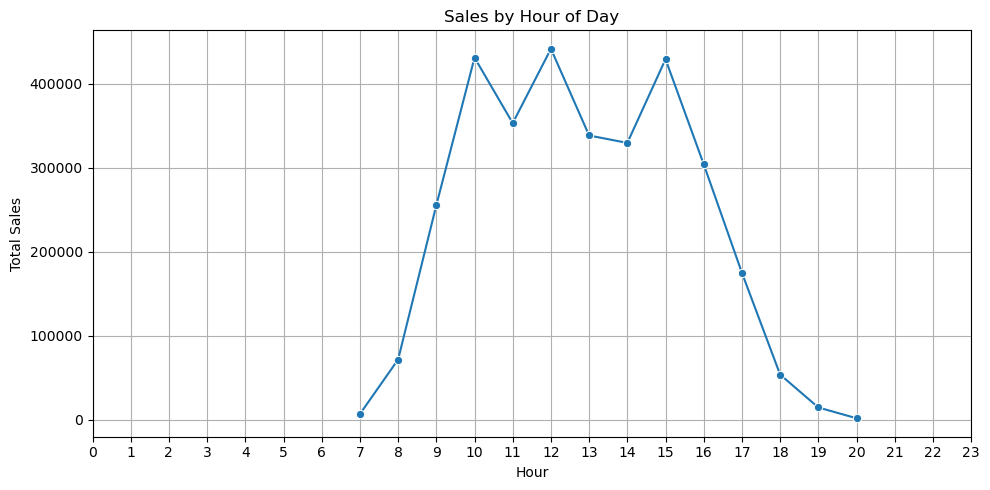

In [49]:
#SALES BY TIME/HOUR OF DAY
hourly_sales = df.groupby('Hour')['TotalPurchaseValue'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_sales, x='Hour', y='TotalPurchaseValue', marker='o')
plt.title('Sales by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


In [52]:
df['IsReturn'] = df['Quantity'] < 0


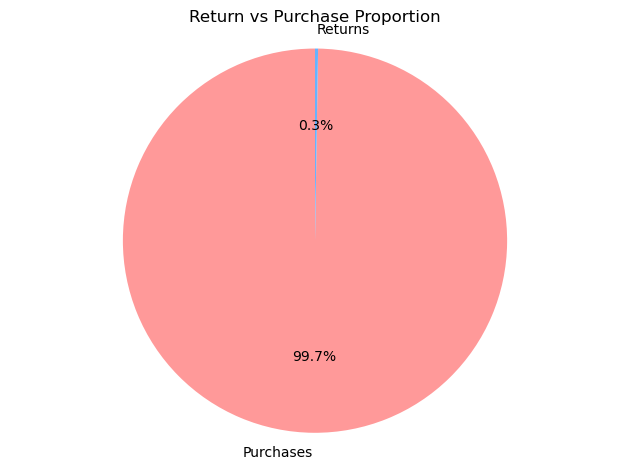

In [53]:
#RETURN VERSUS PURCHASES
import matplotlib.pyplot as plt

returns = df['IsReturn'].value_counts().rename({True: 'Returns', False: 'Purchases'})

# Plot as pie chart
returns.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Return vs Purchase Proportion')
plt.ylabel('')  # Hide y-label
plt.axis('equal')  # Equal aspect ratio for pie chart
plt.tight_layout()
plt.show()


In [54]:
#DISPLAYING RETURN VERSUS PURCHASE IN COUNT
print("Return vs Purchase Counts:")
print(returns)


Return vs Purchase Counts:
IsReturn
Purchases    516086
Returns        1324
Name: count, dtype: int64


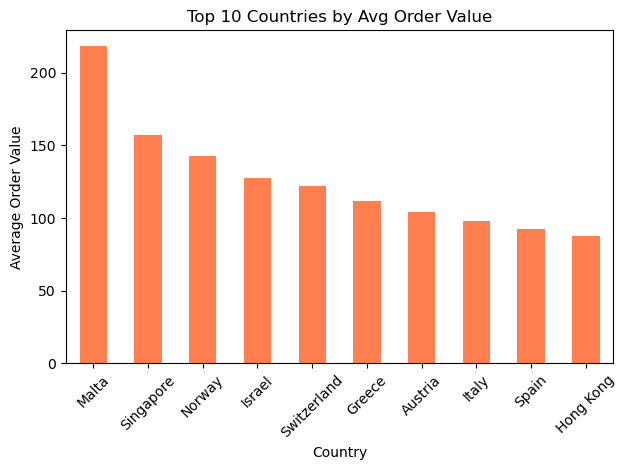

In [55]:
#AVERAGE ORDER VALUE BY COUNTRY
avg_order_value = df.groupby('Country')['TotalPurchaseValue'].mean().sort_values(ascending=False).head(10)

avg_order_value.plot(kind='bar', color='coral')
plt.title('Top 10 Countries by Avg Order Value')
plt.ylabel('Average Order Value')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


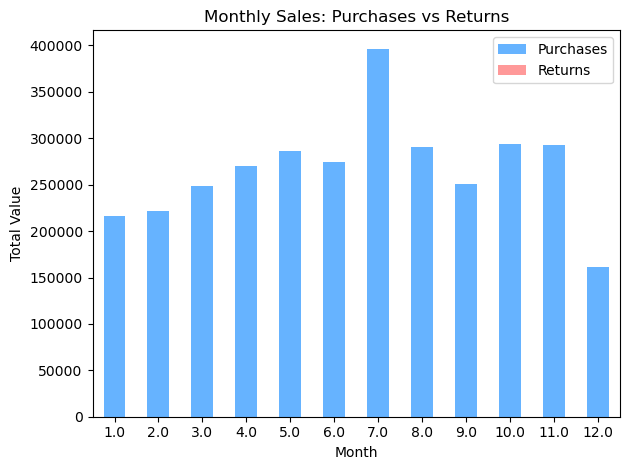

In [56]:
#MONTHLY TREND OF RETURN VERSUS PURCHASE
df['IsReturn'] = df['Quantity'] < 0
monthly_returns = df.groupby(['Month', 'IsReturn'])['TotalPurchaseValue'].sum().unstack().fillna(0)

monthly_returns.plot(kind='bar', stacked=True, color=['#66b3ff', '#ff9999'])
plt.title('Monthly Sales: Purchases vs Returns')
plt.ylabel('Total Value')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.legend(['Purchases', 'Returns'])
plt.tight_layout()
plt.show()


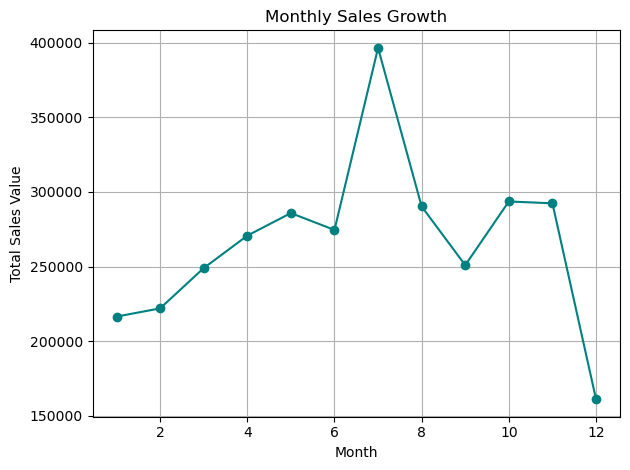

In [57]:
#MONTHLY SALES GROWTH
monthly_growth = df.groupby('Month')['TotalPurchaseValue'].sum()

monthly_growth.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Sales Growth')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_25012\2029132018.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dayperiod_sales = df.groupby('DayPeriod')['TotalPurchaseValue'].sum()


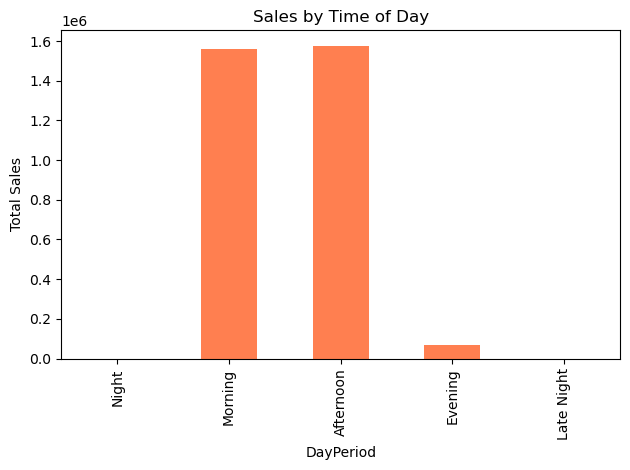

In [63]:
#SALES BY PART OF THE DAY
df['Hour'] = df['Date'].dt.hour
df['DayPeriod'] = pd.cut(df['Hour'],
                         bins=[-1, 6, 12, 17, 21, 24],
                         labels=['Night', 'Morning', 'Afternoon', 'Evening', 'Late Night'])

dayperiod_sales = df.groupby('DayPeriod')['TotalPurchaseValue'].sum()

dayperiod_sales.plot(kind='bar', color='coral')
plt.title('Sales by Time of Day')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


In [65]:
#SALES BY PART OF A DAY IN COUNT
# Group by 'DayPeriod' and sum 'TotalPurchaseValue', without showing the warning
dayperiod_sales = df.groupby('DayPeriod', observed=True)['TotalPurchaseValue'].sum()

# Display the results
print(dayperiod_sales)


DayPeriod
Morning      1558439.0
Afternoon    1575002.0
Evening        69817.0
Name: TotalPurchaseValue, dtype: float64


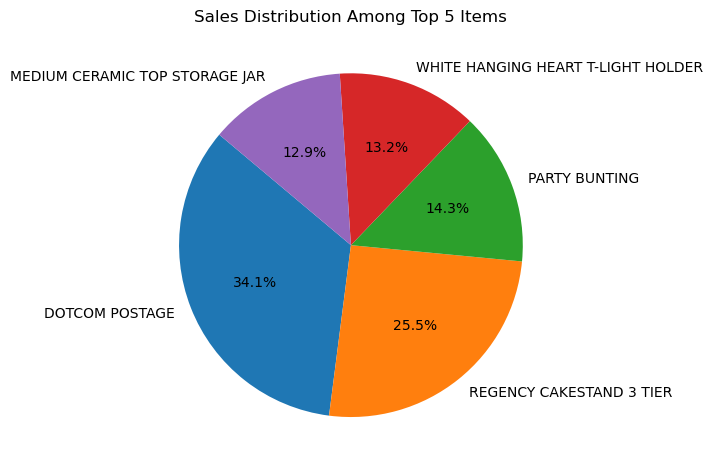

In [66]:
#SALES DISTRIBUTION AMONG TOP 5 ITEMS
top_items_pie = df.groupby('Itemname')['TotalPurchaseValue'].sum().sort_values(ascending=False).head(5)

top_items_pie.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution Among Top 5 Items')
plt.ylabel('')
plt.tight_layout()
plt.show()


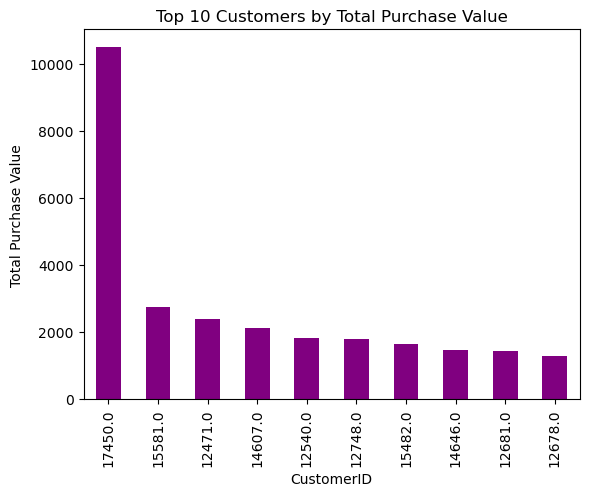

In [68]:
#TOP CUSTOMERS BY TOTAL PURCHASE VALUE
# Group by CustomerID and calculate total purchase value
customer_sales = df.groupby('CustomerID')['TotalPurchaseValue'].sum().sort_values(ascending=False).head(10)

# Plotting the results
customer_sales.plot(kind='bar', color='purple')
plt.title('Top 10 Customers by Total Purchase Value')
plt.ylabel('Total Purchase Value')
plt.show()


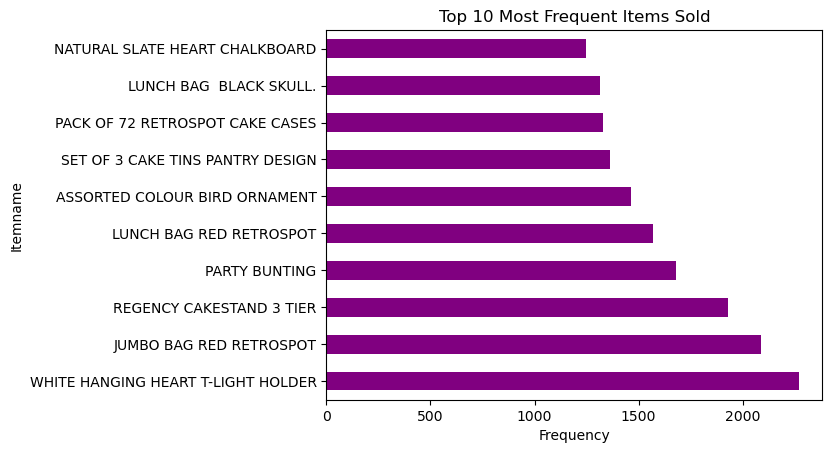

In [69]:
#TOP 10 MOST FREQUENT ITEMS 
# Get the top 10 most frequent items sold
top_items = df['Itemname'].value_counts().head(10)

# Plotting the results
top_items.plot(kind='barh', color='purple')
plt.title('Top 10 Most Frequent Items Sold')
plt.xlabel('Frequency')
plt.show()


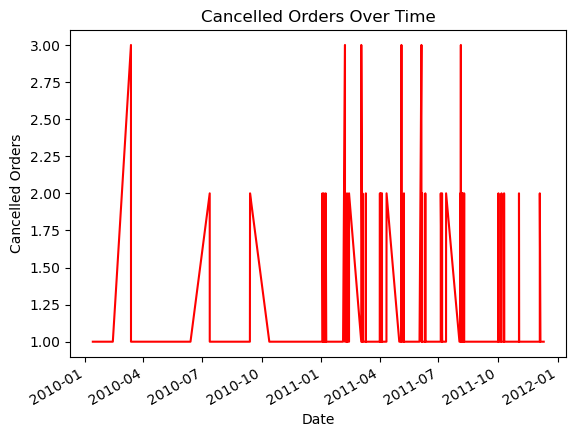

In [71]:
#CANCELLED ORDER OVER TIME
# Filter data for cancelled orders (assuming negative quantity represents cancellations)
cancelled_orders = df[df['Quantity'] < 0].groupby('Date')['Quantity'].count()

# Plotting cancelled orders over time
cancelled_orders.plot(kind='line', color='red')
plt.title('Cancelled Orders Over Time')
plt.ylabel('Cancelled Orders')
plt.xlabel('Date')
plt.show()


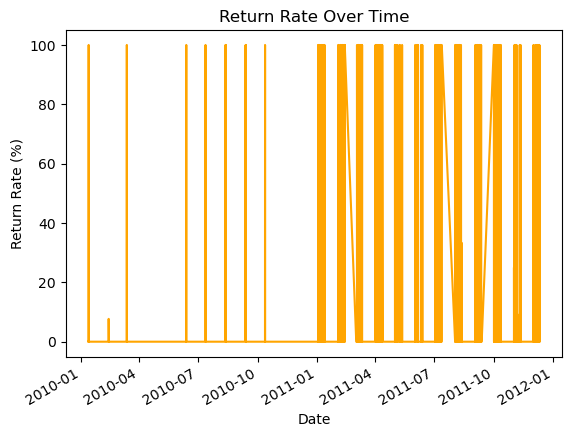

In [72]:
#RETURN RATE OVER TIME
# Assuming 'IsReturn' is a column indicating return transactions
return_rate = df.groupby('Date').apply(lambda x: (x['IsReturn'].sum() / len(x)) * 100)

# Plotting return rate over time
return_rate.plot(kind='line', color='orange')
plt.title('Return Rate Over Time')
plt.ylabel('Return Rate (%)')
plt.xlabel('Date')
plt.show()


Top 5 Customers by Number of Orders:
CustomerID
17450.0    37
12569.0    31
12682.0    29
14646.0    23
12681.0    22
Name: count, dtype: int64


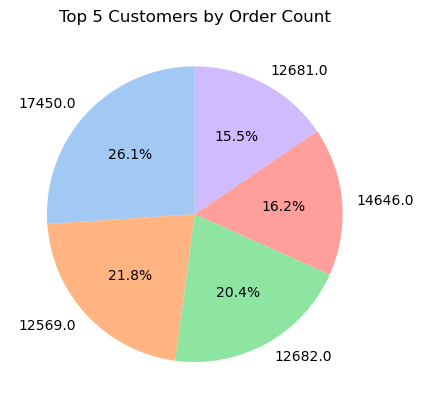

In [73]:
#TOP 5 MOST ACTIVE CUSTOMERS
top_customers = df['CustomerID'].value_counts().head(5)
print("Top 5 Customers by Number of Orders:")
print(top_customers)

# Pie chart
top_customers.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Top 5 Customers by Order Count")
plt.ylabel('')
plt.show()


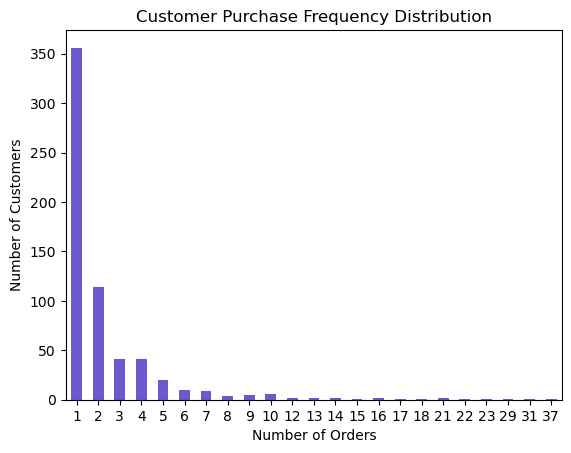

In [79]:
#CUSTOMER RETAINMENT FREQUENCY
order_counts = df['CustomerID'].value_counts()
order_distribution = order_counts.value_counts().sort_index()

order_distribution.plot(kind='bar', color='slateblue')
plt.title("Customer Purchase Frequency Distribution")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.show()


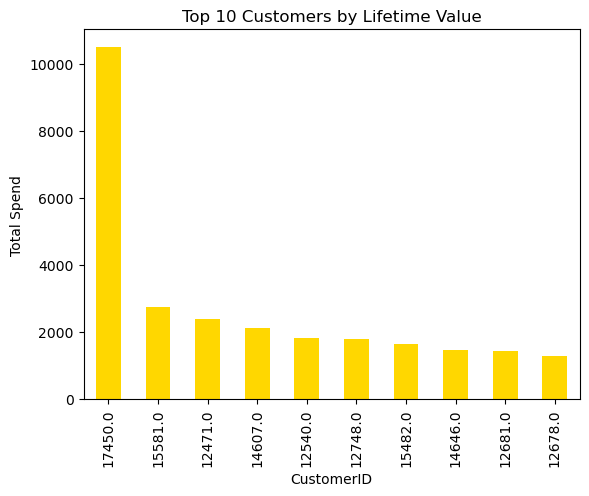

In [81]:
#CUSTOMER LIFE TIME VALUE
clv = df.groupby('CustomerID')['TotalPurchaseValue'].sum().sort_values(ascending=False).head(10)
clv.plot(kind='bar', color='gold')
plt.title("Top 10 Customers by Lifetime Value")
plt.xlabel("CustomerID")
plt.ylabel("Total Spend")
plt.show()

Top 5 Most Returned Items with Counts and Percentage of Total Returns:
check: 120 returns, 9.06% of total returns
damages: 45 returns, 3.40% of total returns
damaged: 42 returns, 3.17% of total returns
?: 41 returns, 3.10% of total returns
sold as set on dotcom: 20 returns, 1.51% of total returns


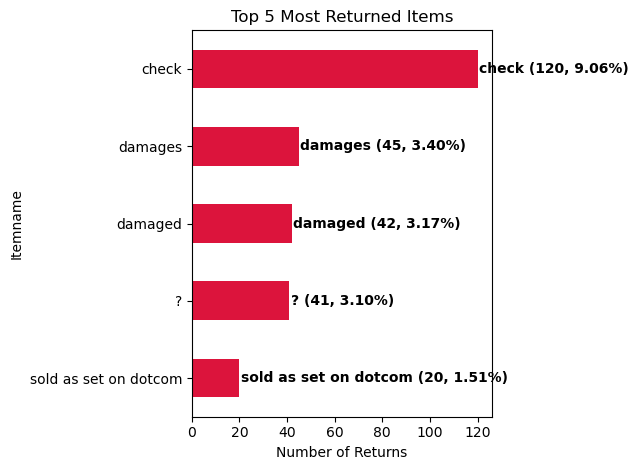

In [87]:
# MOST RETURNED ITEMS WITH COUNTS
most_returned_items = df[df['Quantity'] < 0]['Itemname'].value_counts().head(5)

# Calculate total returns (negative quantities)
total_returns = df[df['Quantity'] < 0]['Quantity'].count()

# Print the counts
print("Top 5 Most Returned Items with Counts and Percentage of Total Returns:")

# Calculate percentage of total returns for each item
percentage_returned = (most_returned_items / total_returns) * 100

# Display the counts and percentages
for item, count, percentage in zip(most_returned_items.index, most_returned_items.values, percentage_returned):
    print(f'{item}: {count} returns, {percentage:.2f}% of total returns')

# Plot the bar chart with annotations
ax = most_returned_items.plot(kind='barh', color='crimson')
plt.title("Top 5 Most Returned Items")
plt.xlabel("Number of Returns")
plt.gca().invert_yaxis()

# Annotate each bar with its count, item name, and percentage
for i, (value, name, percentage) in enumerate(zip(most_returned_items.values, most_returned_items.index, percentage_returned)):
    ax.text(value + 0.5, i, f'{name} ({value}, {percentage:.2f}%)', va='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()


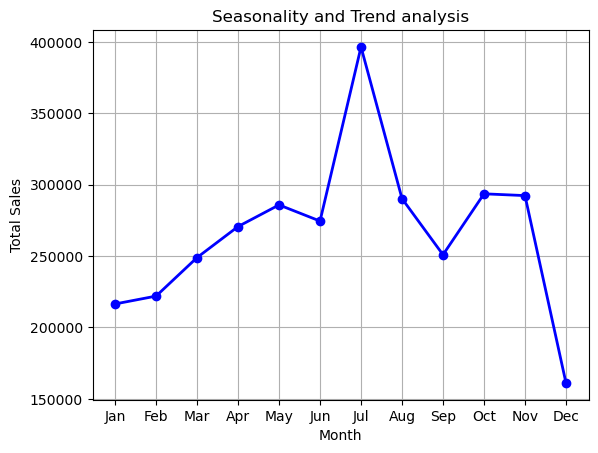

In [89]:
#SEASONALITY AND TREND ANALYSIS
# Aggregate sales by month
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['TotalPurchaseValue'].sum()

# Plot monthly sales trends
monthly_sales.plot(kind='line', marker='o', color='b', linewidth=2)
plt.title('Seasonality and Trend analysis')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


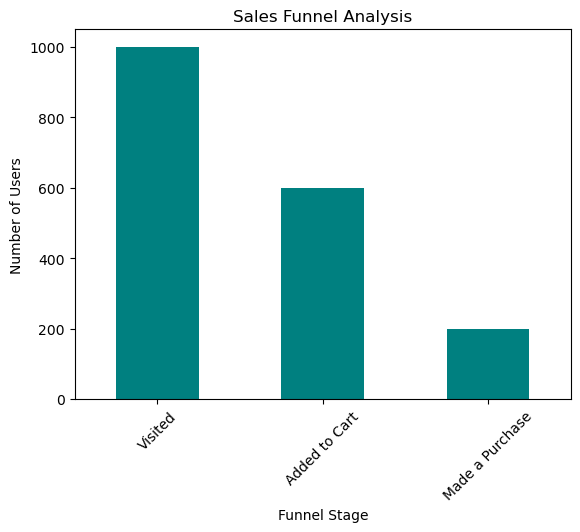

In [90]:
#SALES CONVEERSION RATE ANALYSIS/SALES FUNNEL ANALYSIS
# Assuming you have data on different stages of the funnel (for example: visits -> added to cart -> purchases)
funnel_data = {
    'Stage': ['Visited', 'Added to Cart', 'Made a Purchase'],
    'Count': [1000, 600, 200]  # Example counts at each stage
}

funnel_df = pd.DataFrame(funnel_data)

# Plot Funnel chart (Bar chart)
funnel_df.set_index('Stage')['Count'].plot(kind='bar', color='teal')
plt.title('Sales Funnel Analysis')
plt.xlabel('Funnel Stage')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()


Return Rate: 0.00%


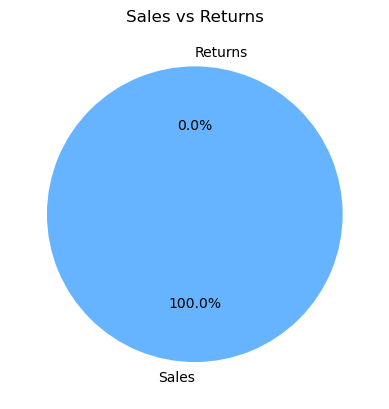

In [92]:
#SALES RETURN RATE ANALYSIS
# Calculate total returns vs total sales
total_sales = df['TotalPurchaseValue'].sum()
total_returns = df[df['Quantity'] < 0]['TotalPurchaseValue'].sum()

# Calculate return rate
return_rate = (total_returns / total_sales) * 100
print(f"Return Rate: {return_rate:.2f}%")

# Plot return rate
labels = ['Sales', 'Returns']
sizes = [total_sales, total_returns]
colors = ['#66b3ff', '#ff6666']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Sales vs Returns')
plt.show()


In [95]:
#TOTAL SPEND BY CUSTOMERS
# Group by CustomerID to calculate total purchase value for each customer
customer_total_spend = df.groupby('CustomerID')['TotalPurchaseValue'].sum()

# Display the top 5 customers by total spend
print("Top 5 Customers by Total Spend:")
print(customer_total_spend.sort_values(ascending=False).head())


Top 5 Customers by Total Spend:
CustomerID
17450.0    10496.0
15581.0     2750.0
12471.0     2400.0
14607.0     2120.0
12540.0     1820.0
Name: TotalPurchaseValue, dtype: float64


In [98]:
#RETURN RATE PER CUSTOMER
# Filter for returns (Quantity < 0)
returns = df[df['Quantity'] < 0]

# Group by CustomerID and calculate the total returns and total purchases
customer_returns = returns.groupby('CustomerID')['Quantity'].sum()
customer_total = df.groupby('CustomerID')['Quantity'].sum()

# Calculate the return rate as the percentage of total returns to total purchases
customer_return_rate = (customer_returns / customer_total).fillna(0) * 100

# Display the top 5 customers with the highest return rate
print("Top 5 Customers by Return Rate:")
print(customer_return_rate.sort_values(ascending=False).head())


Top 5 Customers by Return Rate:
CustomerID
12349.0    0.0
14606.0    0.0
14524.0    0.0
14527.0    0.0
14543.0    0.0
Name: Quantity, dtype: float64


In [99]:
#DAYS SINCE LAST PURCHASE
# Find the date of the last purchase for each customer
customer_last_purchase = df.groupby('CustomerID')['Date'].max()

# Calculate recency (in days) from the most recent date in the dataset
most_recent_date = df['Date'].max()
customer_recency = (most_recent_date - customer_last_purchase).dt.days

# Display the top 5 customers by recency (who made their last purchase most recently)
print("Top 5 Customers by Recency (Last Purchase):")
print(customer_recency.sort_values(ascending=True).head())


Top 5 Customers by Recency (Last Purchase):
CustomerID
12633.0    0.0
12583.0    0.0
15831.0    0.0
12444.0    0.0
12569.0    0.0
Name: Date, dtype: float64


In [102]:
#AVERAGE TIME BETWEEN PURCHASES
# Calculate the time difference between consecutive purchases
df['PrevPurchaseDate'] = df.groupby('CustomerID')['Date'].shift(1)
df['TimeBetweenPurchases'] = (df['Date'] - df['PrevPurchaseDate']).dt.days

# Calculate average time between purchases per customer
avg_time_between_purchases = df.groupby('CustomerID')['TimeBetweenPurchases'].mean()

# Display the top 5 customers with the shortest average time between purchases
print("Top 5 Customers by Shortest Time Between Purchases:")
print(avg_time_between_purchases.sort_values().head())


Top 5 Customers by Shortest Time Between Purchases:
CustomerID
14178.0   -304.0
17858.0   -241.0
12693.0   -241.0
12674.0   -241.0
12483.0   -210.0
Name: TimeBetweenPurchases, dtype: float64


In [103]:
#CUSTOMER ACTIVITY OVER TIME
# Extract the month and year from the Date column
df['MonthYear'] = df['Date'].dt.to_period('M')

# Aggregate total spend by month/year
monthly_sales = df.groupby('MonthYear')['TotalPurchaseValue'].sum()

# Display monthly sales
print("Total Sales by Month:")
print(monthly_sales)


Total Sales by Month:
MonthYear
2010-01     44513.0
2010-02     33114.0
2010-03     36667.0
2010-05     22828.0
2010-06     42617.0
2010-07     86797.0
2010-08     33062.0
2010-09     40393.0
2010-10     47164.0
2010-12     12229.0
2011-01    171952.0
2011-02    188858.0
2011-03    212286.0
2011-04    270682.0
2011-05    263017.0
2011-06    231902.0
2011-07    309715.0
2011-08    257179.0
2011-09    210538.0
2011-10    246454.0
2011-11    292369.0
2011-12    148922.0
Freq: M, Name: TotalPurchaseValue, dtype: float64


In [104]:
#TOTAL SPEND BY EACH CUSTOMER
# Calculate total spend by each customer
customer_total_spend = df.groupby('CustomerID')['TotalPurchaseValue'].sum()

# Display the top 5 customers by total spend
print("Top 5 Customers by Total Spend:")
print(customer_total_spend.sort_values(ascending=False).head())


Top 5 Customers by Total Spend:
CustomerID
17450.0    10496.0
15581.0     2750.0
12471.0     2400.0
14607.0     2120.0
12540.0     1820.0
Name: TotalPurchaseValue, dtype: float64


In [105]:
#AVERAGE SPEND PER TRANSACTION PER CUSTOMER
# Calculate average spend per transaction for each customer
customer_avg_spend = df.groupby('CustomerID')['TotalPurchaseValue'].mean()

# Display the top 5 customers by average spend per transaction
print("Top 5 Customers by Average Spend per Transaction:")
print(customer_avg_spend.sort_values(ascending=False).head())


Top 5 Customers by Average Spend per Transaction:
CustomerID
15581.0    916.666667
15299.0    600.000000
14607.0    530.000000
12590.0    523.000000
17949.0    480.000000
Name: TotalPurchaseValue, dtype: float64


In [106]:
#TOTAL REVENUE GENERATED
# Calculate total revenue by summing the TotalPurchaseValue
total_revenue = df['TotalPurchaseValue'].sum()

print(f"Total Revenue Generated: ${total_revenue:.2f}")


Total Revenue Generated: $7433945.00


In [114]:
# Sorting the dataframe by 'TotalPurchaseValue' to find the most expensive purchases
most_expensive_purchases = df.sort_values(by='TotalPurchaseValue', ascending=False).head(5)

# Selecting the columns to display: CustomerID, Itemname, TotalPurchaseValue
most_expensive_purchases_table = most_expensive_purchases[['CustomerID', 'Itemname', 'TotalPurchaseValue']]

# Display the top 5 most expensive purchases
print("Top 5 Most Expensive Purchases:")
print(most_expensive_purchases_table)


Top 5 Most Expensive Purchases:
   CustomerID                        Itemname  TotalPurchaseValue
0       59999  MEDIUM CERAMIC TOP STORAGE JAR             74215.0
1      214933  PICNIC BASKET WICKER 60 PIECES             38940.0
2       14696                      AMAZON FEE             13541.0
3      288772                 Adjust bad debt             11062.0
4      167329                         POSTAGE              8142.0
